In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./data/tuberculosis_indicators_for_philippines_7.csv')
df.head()

,gho_code,gho_display,gho_url,publishstate_code,publishstate_display,publishstate_url,year_code,year_display,year_url,region_code,...,country_code,country_display,country_url,display_value,numeric,low,high,stderr,stddev,comments
0,MDG_0000000030,Smear-positive tuberculosis case-detection rat...,NaN,PUBLISHED,Published,NaN,2000,2000,NaN,WPR,...,PHL,Philippines,NaN,53 [44-66],53.0,44.0,66.0,NaN,NaN,NaN
1,MDG_0000000030,Smear-positive tuberculosis case-detection rat...,NaN,PUBLISHED,Published,NaN,2008,2008,NaN,WPR,...,PHL,Philippines,NaN,67 [56-84],67.0,56.0,84.0,NaN,NaN,NaN
2,TB_tot_newrel,Tuberculosis - new and relapse cases,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,1990,1990,NaN,WPR,...,PHL,Philippines,NaN,317008,317008.0,NaN,NaN,NaN,NaN,NaN
3,TB_tot_newrel,Tuberculosis - new and relapse cases,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,1992,1992,NaN,WPR,...,PHL,Philippines,NaN,236172,236172.0,NaN,NaN,NaN,NaN,NaN
4,TB_tot_newrel,Tuberculosis - new and relapse cases,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,1993,1993,NaN,WPR,...,PHL,Philippines,NaN,178134,178134.0,NaN,NaN,NaN,NaN,NaN


In [35]:
df.shape

(652, 11)

Clean the data.

In [3]:
df.columns

Index(['gho_code', 'gho_display', 'gho_url', 'publishstate_code',
       'publishstate_display', 'publishstate_url', 'year_code', 'year_display',
       'year_url', 'region_code', 'region_display', 'region_url',
       'worldbankincomegroup_code', 'startyear', 'endyear',
       'worldbankincomegroup_display', 'worldbankincomegroup_url',
       'country_code', 'country_display', 'country_url', 'display_value',
       'numeric', 'low', 'high', 'stderr', 'stddev', 'comments'],
      dtype='object')

In [5]:
for i in df.columns:
    print(f'{i}: {df[i].nunique()}')

gho_code: 56
gho_display: 55
gho_url: 25
publishstate_code: 1
publishstate_display: 1
publishstate_url: 0
year_code: 29
year_display: 29
year_url: 0
region_code: 1
region_display: 1
region_url: 0
worldbankincomegroup_code: 1
startyear: 29
endyear: 29
worldbankincomegroup_display: 1
worldbankincomegroup_url: 0
country_code: 1
country_display: 1
country_url: 0
display_value: 467
numeric: 412
low: 138
high: 165
stderr: 0
stddev: 0
comments: 0


Drop all columns with 0 or 1 unique values.

In [7]:
for i in df.columns:
    if df[i].nunique() <= 1:
        df.drop(i, axis=1, inplace=True)

In [10]:
df.head()

,gho_code,gho_display,gho_url,year_code,year_display,startyear,endyear,display_value,numeric,low,high
0,MDG_0000000030,Smear-positive tuberculosis case-detection rat...,NaN,2000,2000,2000,2000,53 [44-66],53.0,44.0,66.0
1,MDG_0000000030,Smear-positive tuberculosis case-detection rat...,NaN,2008,2008,2008,2008,67 [56-84],67.0,56.0,84.0
2,TB_tot_newrel,Tuberculosis - new and relapse cases,https://www.who.int/data/gho/indicator-metadat...,1990,1990,1990,1990,317008,317008.0,NaN,NaN
3,TB_tot_newrel,Tuberculosis - new and relapse cases,https://www.who.int/data/gho/indicator-metadat...,1992,1992,1992,1992,236172,236172.0,NaN,NaN
4,TB_tot_newrel,Tuberculosis - new and relapse cases,https://www.who.int/data/gho/indicator-metadat...,1993,1993,1993,1993,178134,178134.0,NaN,NaN


Check if `gho_code`, `gho_display`, and `gho_url` has a 1:1:1 ratio. One way to check is if the number of unique values for each column is the same.

In [34]:
print(df.gho_code.nunique())
print(df.gho_display.nunique())
print(df.gho_url.nunique())

56
55
25


In [50]:
df.isna().sum()

gho_code           0
gho_display        0
gho_url           12
year_code          0
year_display       0
startyear          0
endyear            0
display_value      0
numeric           18
low              464
high             464
dtype: int64

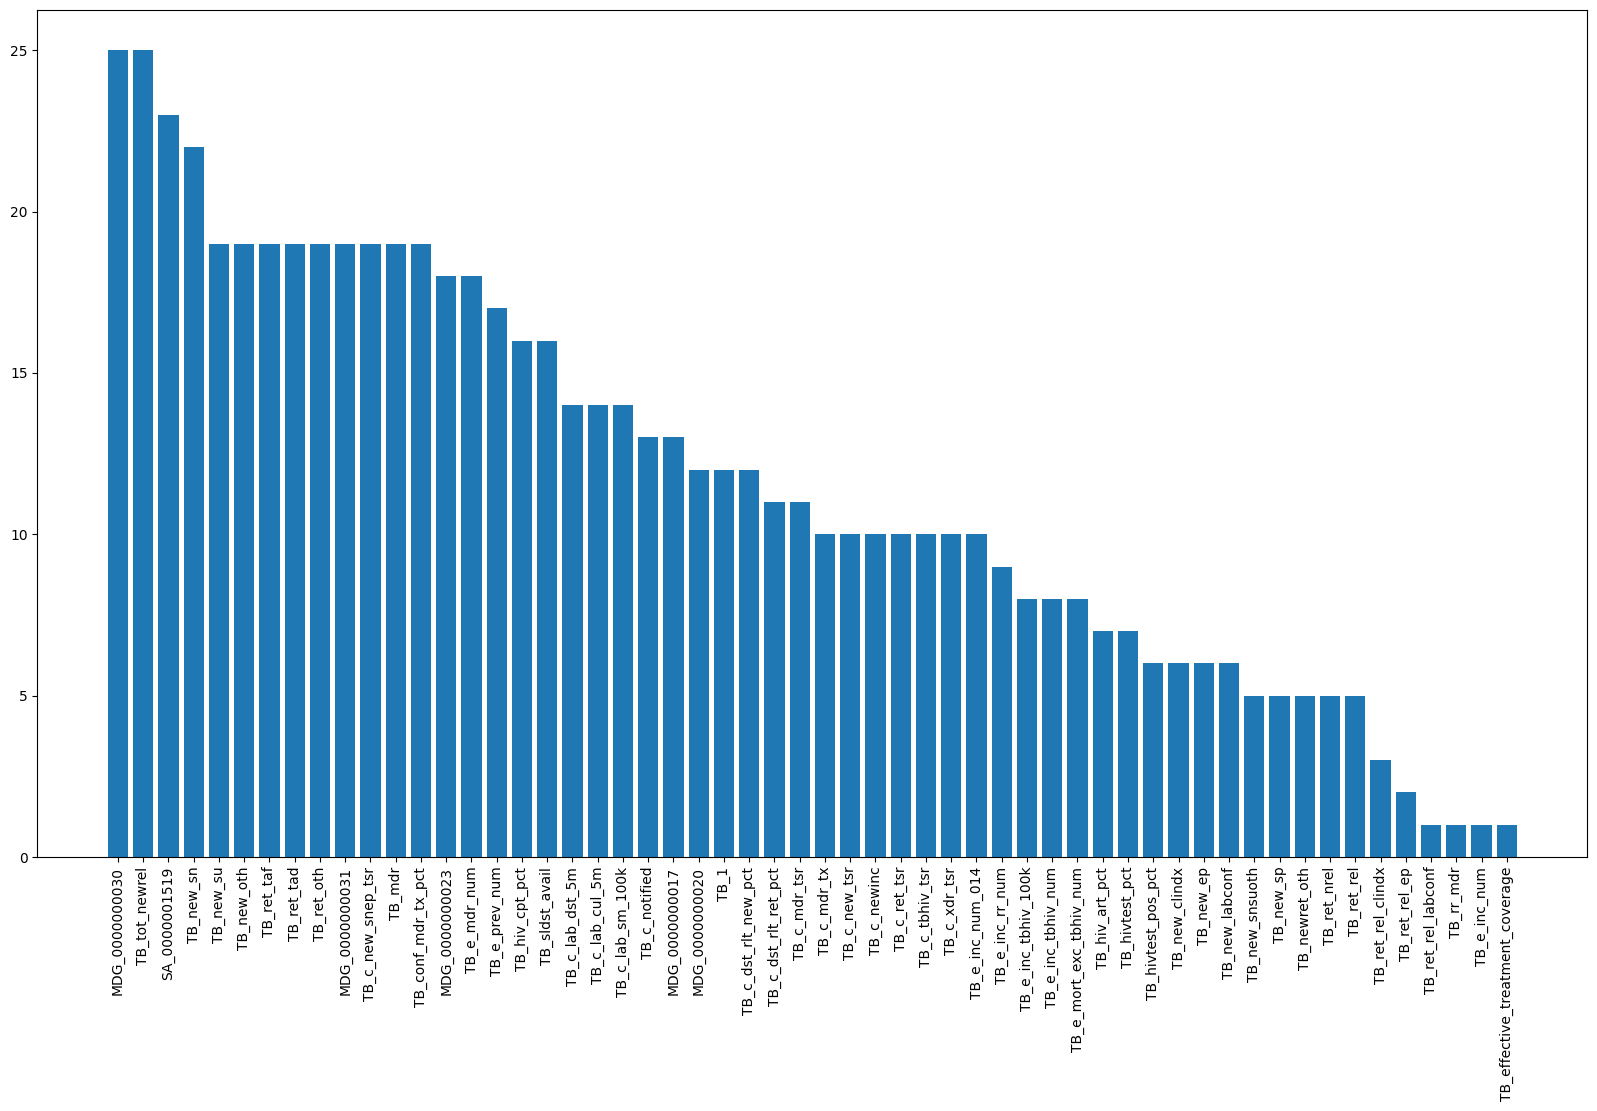

In [49]:
plt.figure(figsize=(20,11))
plt.bar(x=df.gho_code.unique(), height=df.gho_code.value_counts())
plt.xticks(rotation=90)
plt.show()

In [ ]:
# plt.figure(figsize=(20,11))
df.gho_display.fillna()
plt.bar(x=df.gho_display.unique(), height=df.gho_code.value_counts())
plt.xticks(rotation=90)
plt.show()

In [11]:
# set id as columns
df.set_index('id', inplace=True)
df

,rif,inh,pza,emb,str,cip,cap,amk,moxi,oflx,kan
id,,,,,,,,,,,
101,R,R,R,R,R,NaN,NaN,S,NaN,NaN,NaN
102,R,R,R,R,R,NaN,NaN,R,NaN,NaN,NaN
103,R,R,S,R,R,NaN,NaN,R,NaN,NaN,NaN
104,R,R,NaN,R,R,NaN,NaN,S,NaN,NaN,NaN
105,R,R,S,S,S,NaN,NaN,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
SRR2101823,S,S,S,S,S,NaN,NaN,NaN,NaN,NaN,NaN
SRR2101824,S,S,S,S,S,NaN,NaN,NaN,NaN,NaN,NaN
SRR2101825,S,S,S,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.fillna('X', inplace=True)
df.head()

,rif,inh,pza,emb,str,cip,cap,amk,moxi,oflx,kan
id,,,,,,,,,,,
101,R,R,R,R,R,X,X,S,X,X,X
102,R,R,R,R,R,X,X,R,X,X,X
103,R,R,S,R,R,X,X,R,X,X,X
104,R,R,X,R,R,X,X,S,X,X,X
105,R,R,S,S,S,X,X,S,X,X,X


In [26]:
for i in df.columns:
    cntR, cntS, cntN = df[df[i] == 'R']['rif'].count(), df[df[i] == 'S']['rif'].count(), df[df[i] == 'X']['rif'].count()
    print(f'{i}: R-{cntR}, S-{cntS}, NaN-{cntN}')

rif: R-1292, S-2464, NaN-77
inh: R-1570, S-2209, NaN-54
pza: R-702, S-2656, NaN-475
emb: R-977, S-2764, NaN-92
str: R-1031, S-1186, NaN-1616
cip: R-238, S-977, NaN-2618
cap: R-589, S-824, NaN-2420
amk: R-235, S-1199, NaN-2399
moxi: R-269, S-1145, NaN-2419
oflx: R-89, S-678, NaN-3066
kan: R-272, S-1087, NaN-2474
